# Imports

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import pickle

import warnings
warnings.simplefilter('ignore')

# Loading data

In [47]:
df = pd.read_csv('term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


##### Attributes:
<ul>
<li type="square"> <b>age</b> : age of customer (numeric)</li><br>
<li type="square"> <b>job</b> : type of job (categorical)</li><br>
<li type="square"> <b>marital</b> : marital status (categorical)</li><br>
<li type="square"> <b>education</b> : level of education(categorical)</li><br>
<li type="square"> <b>default</b> : has credit in default? (binary)</li><br>
<li type="square"> <b>balance</b> : average yearly balance, in euros (numeric)</li><br>
<li type="square"> <b>housing</b> : has a housing loan? (binary)</li><br>
<li type="square"> <b>loan</b> : has personal loan? (binary)</li><br>
<li type="square"> <b>contact</b> : contact communication type (categorical)</li><br>
<li type="square"> <b>day</b> : last contact day of the month (numeric)</li><br>
<li type="square"> <b>month</b> : last contact month of year (categorical)</li><br>
<li type="square"> <b>duration</b> : last contact duration, in seconds (numeric)</li><br>
<li type="square"> <b>campaign</b> : number of contacts performed during this campaign and for this client (numeric, includes last contact)</li><br>

</ul>
<b>Outputs(desired target):</b>
<ul>
<li type="square"><b>y</b>: has the client subscribed to a term deposit? (binary)</li><br>
</ul>

# Data Visualization 

In [48]:
# To check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

##### Summary
<ul>
<li type="square"> Fortunatly thre are no missing values.</li><br>
</ul>

In [49]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


##### Summary:
<ul>
<li type="square"> The <b>mean age</b> is aproximately 40 years old. (Minimum: 19 years old and Maximum: 95 years old.)</li><br>
<li type="square"> The <b>mean balance</b> is about 1274. However, the Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the dataset.</li><br>
</ul>

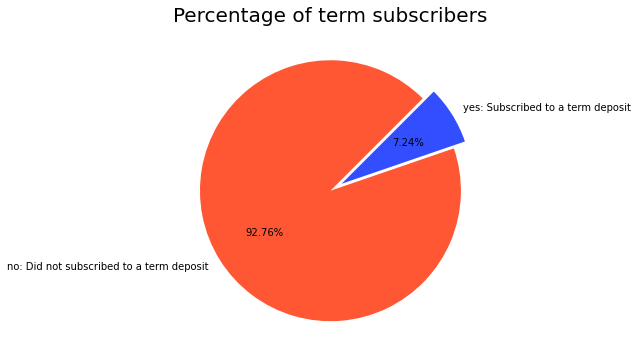

In [50]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes()

colors = ['#FF5733', '#334EFF']
labels = ['no: Did not subscribe to a term deposit',
          'yes: Subscribed to a term deposit']
plt.title('Percentage of term subscribers', fontsize=20)
plt.pie(df.y.value_counts(), explode=[0, 0.1], autopct='%1.2f%%',
        colors=colors, labels=labels, startangle=45)
plt.show()

##### Summary:
<ul>
<li type="square"> The Percentage of client who subscribed to the term deposit is just 7.24%.</li><br>
<li type="square"> However, the Percentage of client who didn't subscribe to the term deposit is greater than 92%.</li><br>
</ul>

In [75]:
def barplot_of_feature_with_balance(x,y='balance',palette=colors,hue='y', data=df):
    fig = plt.figure(figsize=(12,8))
    sns.barplot(x=x,y=y,hue=hue,data=data, palette=palette,
                estimator= lambda x: len(x) / len(df) * 100)
    plt.ylabel('%')
    plt.title(f'Percentage of balance for eah {x} status', fontsize=16)
    plt.show()

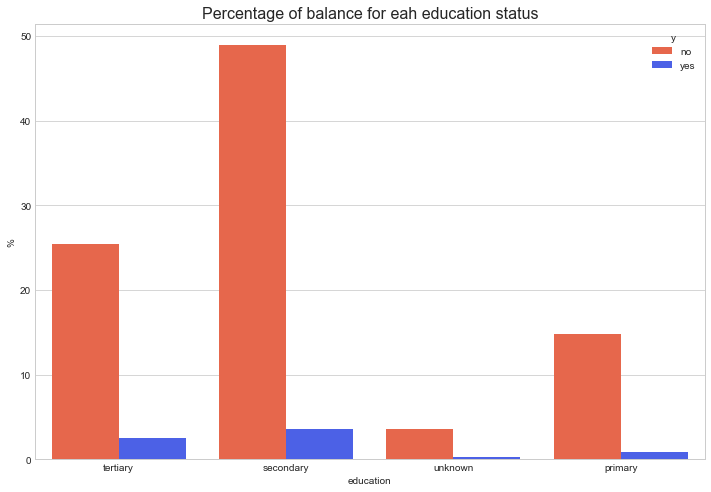

In [76]:
barplot_of_feature_with_balance('education')

##### Summary:
<ul>
<li type="square"> The balance percentage of secondary students is the highest.</li><br>
<li type="square"> But the balance percentage of those subsubribed is just about 4%.</li><br>
</ul>

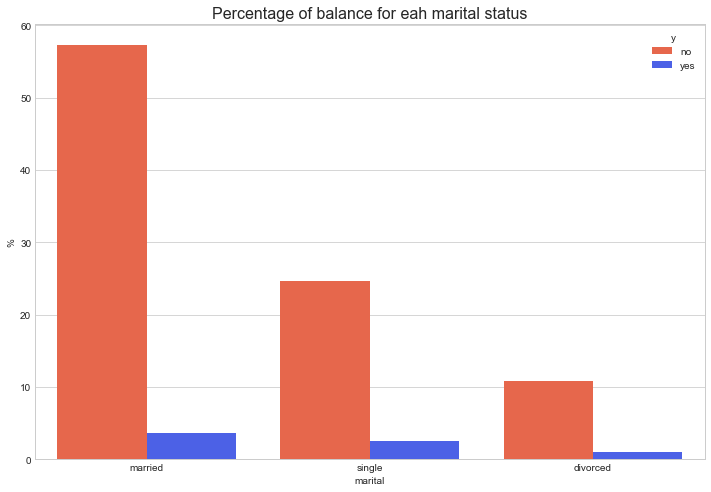

In [77]:
barplot_of_feature_with_balance('marital')

##### Summary:
<ul>
<li type="square"> The balance percentage of married poeple is the highest.</li><br>
<li type="square"> However, the balance percentage of the divorced poeple is the lowest.</li><br>
</ul>

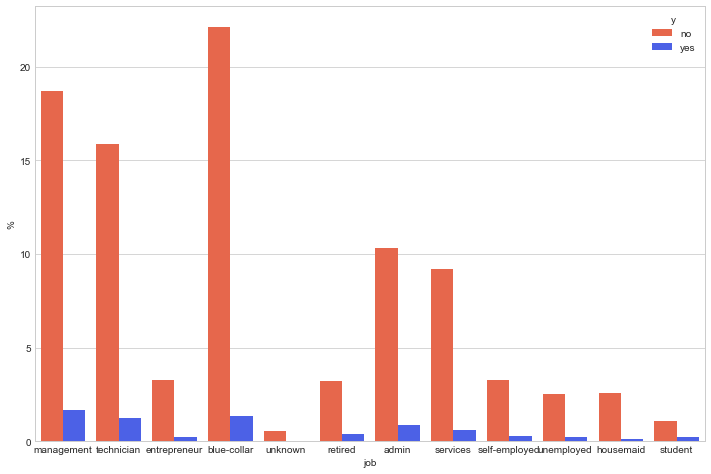

In [74]:
barplot_of_feature_with_balance('job')

##### Summary:
<ul>
<li type="square"> The balance percentage of blue-collar poeple is the highest.</li><br>
<li type="square"> However the balance percentage of the management people who subscribed to the term deposit is the highest.</li><br>
</ul>

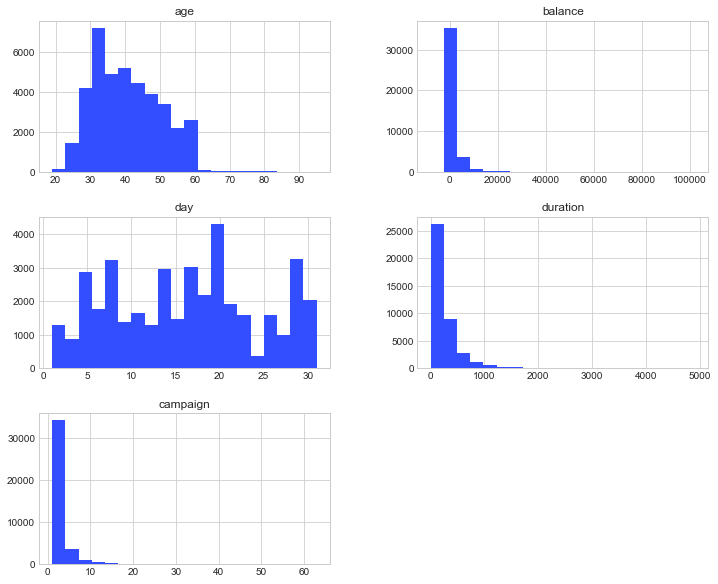

In [56]:
plt.style.use('seaborn-whitegrid')
df.hist(bins=20, figsize=(12,10), color=colors[1])
plt.show()

##### Summary:
<ul>
<li type="square"> The highest number of clients are between 30 and 40 years old. </li><br>
<li type="square"> The highest number of clients have balance less than 5000.</li><br>
<li type="square"> The most compaigns have been done on the 20th of month. However the last ones have been done one the 24th day.</li><br>
<li type="square"> The highest number of compains have been token less than 300 seconds.</li><br>
<li type="square"> The highest number of clients have been contacted less than 3 times for compaign.</li><br>
</ul>

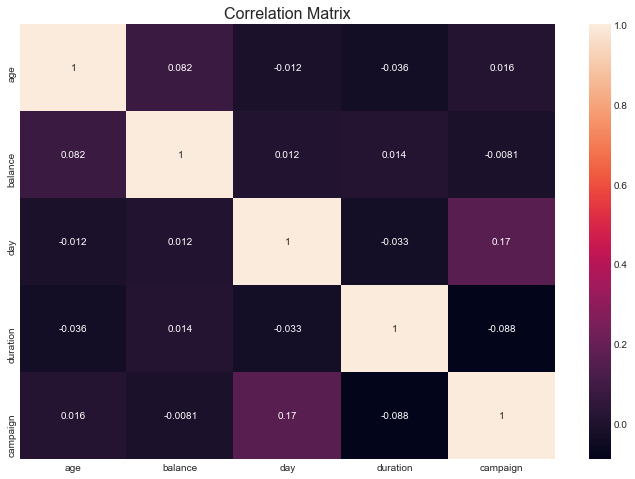

In [57]:
fig = plt.figure(figsize=(12,8))


numeric_df = df.select_dtypes(exclude='object')

corr_numeric = numeric_df.corr()

sns.heatmap(corr_numeric, annot=True, cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

##### Summary:
<ul>
<li type="square"> The highest correlation is between features day and campaign </li><br>
<li type="square"> However the lowest one is between features balance and compaign</li><br>
</ul>

In [63]:
df[df['contact']=='unknown']['y'].value_counts()/len(df) * 100

no     30.6700
yes     1.2425
Name: y, dtype: float64

In [79]:
df[df['job']=='unknown']['y'].value_counts()/len(df) * 100

no     0.5450
yes    0.0425
Name: y, dtype: float64

In [78]:
df[df['education']=='unknown']['y'].value_counts()/len(df) * 100

no     3.5875
yes    0.2400
Name: y, dtype: float64

##### Summary:
<ul>
<li type="square"> The clients with <b>unknown</b> contact, education, and job constitue a part of the clients who subscribed to the term deposit. </li><br>
<li type="square"> So we will keep this value.</li><br>
</ul>

# Data Processing

##### Introduction:
<ul>
<li type="square"> We will use <b>LabelEncoder</b> to encode the categorical features.</li><br>
<li type="square"> We will take the last feature, which is <b>y</b>, as the label and the rest of data as features.</li><br>
<li type="square"> Then we will divise the data to a training data, and test data with 10% size.</li><br>
</ul>

In [81]:
encode = LabelEncoder()
categorical_df = df.select_dtypes(include='object')
classes_names = dict()
for col_name in list(categorical_df.columns.values):
    
    df[col_name] = encode.fit_transform(df[col_name])
    classes_names[col_name] = list(encode.classes_)

In [82]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0


In [83]:
y = df['y']
X = df.drop('y', axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [85]:
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_train.shape : ', y_train.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (36000, 13)
X_test.shape :  (4000, 13)
y_train.shape :  (36000,)
y_test.shape :  (4000,)


# Classification

##### Introduction:
<ul>
<li type="square"> We will define three models of classification using : <b>Logistic Regression</b>, <b>K Nearest Neighbors</b>, and <b>Random Forest</b>.</li><br>
<li type="square"> For <b>Logistic Regression</b> and <b>K Nearest Neighbors</b>, we will define a pipeline of <b>StandardScaler</b> to scale the data and the model.</li><br>
<li type="square"> Then we will use GridSearch method for each model to get the best <b>hyperparameters</b>.</li><br>
</ul>

## 1- Logistic Regression

In [30]:
%%time
logistic_regression_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

param_grid_logistic_regression = {'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
                                  'logisticregression__penalty':['none','l1','l2','elasticnet']
                                  }

grid_search_logistic_regression=GridSearchCV(estimator= logistic_regression_pipeline,
               param_grid= param_grid_logistic_regression,
               scoring='accuracy', cv=5, n_jobs=-1)

grid_search_logistic_regression_scores = cross_val_score(grid_search_logistic_regression, X=X_train, y=y_train,
                                                   scoring='accuracy', cv=5)

grid_search_logistic_regression.fit(X_train, y_train)

grid_search_logistic_regression_best_estimator = grid_search_logistic_regression.best_estimator_
grid_search_logistic_regression_best_estimator.fit(X_train, y_train)

Wall time: 7.78 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

In [31]:
print(f'Train accuracy: {grid_search_logistic_regression.score(X_train, y_train)*100:.1f}%')
print(f'Cross validation accuracy: {np.mean(grid_search_logistic_regression_scores)*100:.1f}%')
print(f'Test accuracy: {grid_search_logistic_regression.score(X_test, y_test)*100:.1f}%')

Train accuracy: 93.3%
Cross validation accuracy: 93.3%
Test accuracy: 93.3%


## 2- KNN

In [32]:
%%time
knn_pipline = make_pipeline(StandardScaler(), KNeighborsClassifier())

grid_search_Knn = GridSearchCV(estimator=knn_pipline, param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
                               scoring='accuracy', cv=5, n_jobs=-1)

grid_search_Knn_scores = cross_val_score(grid_search_Knn, X=X_train, y=y_train, scoring='accuracy', cv=5)

grid_search_Knn.fit(X_train, y_train)

grid_search_Knn_best_estimator = grid_search_Knn.best_estimator_
grid_search_Knn_best_estimator.fit(X_train, y_train)

Wall time: 1min 4s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=7))])

In [33]:
print(f'Train accuracy: {grid_search_Knn.score(X_train, y_train)*100:.1f}%')
print(f'Cross validation accuracy: {np.mean(grid_search_Knn_scores)*100:.1f}%')
print(f'Test accuracy: {grid_search_Knn.score(X_test, y_test)*100:.1f}%')

Train accuracy: 94.2%
Cross validation accuracy: 93.2%
Test accuracy: 93.8%


## 3- Random Forest 

In [35]:
%%time
random_forest = RandomForestClassifier(random_state=1)

param_grid_random_forest = {'n_estimators': [100, 200, 400],
                            'max_depth':[20,40,50,60]}

grid_search_random_forest=GridSearchCV(estimator= random_forest,
               param_grid= param_grid_random_forest,
               scoring='accuracy', cv=5, n_jobs=-1)

grid_search_random_forest_scores = cross_val_score(grid_search_random_forest, X=X_train, y=y_train,
                                                   scoring='accuracy', cv=5)

grid_search_random_forest.fit(X_train, y_train)

grid_search_random_forest_best_estimator = grid_search_random_forest.best_estimator_
grid_search_random_forest_best_estimator.fit(X_train, y_train)

Wall time: 4min 14s


RandomForestClassifier(max_depth=20, n_estimators=400, random_state=1)

In [36]:
print(f'Train accuracy: {grid_search_random_forest.score(X_train, y_train)*100:.1f}%')
print(f'Cross validation accuracy: {np.mean(grid_search_random_forest_scores)*100:.1f}%')
print(f'Test accuracy: {grid_search_random_forest.score(X_test, y_test)*100:.1f}%')

Train accuracy: 99.8%
Cross validation accuracy: 93.6%
Test accuracy: 93.6%


## Save models

In [39]:
pickle.dump(grid_search_logistic_regression, open('logistic_regression.sav', 'wb'))
pickle.dump(grid_search_Knn, open('knn.sav', 'wb'))
pickle.dump(grid_search_random_forest, open('random_forest.sav', 'wb'))

# Metrics

In [94]:
y_pred_by_logistic_regression = grid_search_logistic_regression.predict(X_test)
y_pred_by_knn = grid_search_Knn.predict(X_test)
y_pred_by_random_forest = grid_search_random_forest.predict(X_test)

#### Logistic Regression metrics

In [95]:
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred_by_logistic_regression))
print()
print('Classification_report:\n',classification_report(y_test, y_pred_by_logistic_regression))

Confusion matrix:
 [[3655   61]
 [ 225   59]]

Classification_report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3716
           1       0.49      0.21      0.29       284

    accuracy                           0.93      4000
   macro avg       0.72      0.60      0.63      4000
weighted avg       0.91      0.93      0.91      4000



#### KNN metrics

In [96]:
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred_by_knn))
print()
print('Classification_report:\n',classification_report(y_test, y_pred_by_knn))

Confusion matrix:
 [[3671   45]
 [ 197   87]]

Classification_report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      3716
           1       0.66      0.31      0.42       284

    accuracy                           0.94      4000
   macro avg       0.80      0.65      0.69      4000
weighted avg       0.93      0.94      0.93      4000



#### Random Forest metrics

In [97]:
print('Confusion matrix:\n',confusion_matrix(y_test, y_pred_by_random_forest))
print()
print('Classification_report:\n',classification_report(y_test, y_pred_by_random_forest))

Confusion matrix:
 [[3708    8]
 [  32  252]]

Classification_report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3716
           1       0.97      0.89      0.93       284

    accuracy                           0.99      4000
   macro avg       0.98      0.94      0.96      4000
weighted avg       0.99      0.99      0.99      4000



##### Summary:
<ul>
<li type="square"> The  <b>accuracies</b> are very close and between 93% and 94%.</li><br>
<li type="square"> As the data is unbalanced, we will consider the model with the best <b>Precision</b> and <b>Recall.</b></li><br>
<li type="square"> The <b>Random Forest</b> model has the highest <b>f1-score</b>, which is the harmonic mean of <b>Precision</b> and <b>Recall</b>, so we will consider it as the best model among the other.</li><br>
</ul>